# DEPENDENCIES
_This module, will import all the dependencies for the project_

In [150]:
#Importing Dependencies
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

plotly.tools.set_credentials_file(username='xaskoiking', api_key='vg8y6hlYbXi1ovT1MWLT')

# LOADING THE DATA

_This Module, performs the following actions_

- Load the "GA_DISTRICT_SCHOOLS_EXPENDITURE_2010-2017.xlsx" file, which contains the **GA** School **expenditure** for all _counties_ from _2010 to 2017_

- Load the "GA_DISTRICT_SCHOOLS_REVENUE_2010-2017.xlsx" file, which contains the **GA** School **expenditure** for all _counties_ from _2010 to 2017_

- Load the "SAT.csv" file, which contains the **SAT Scores** of all the counties between _2011 and 2016_

In [151]:
!pip install xlrd

mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#                             <u><center><font color=green size=50>DATA EXPLORATION AND CLEANING</font></center></u>

In [152]:
%%html
<img src = "Pipeline.png", width=900, height=800>

**<font color='blue'>(1) Exploration and Cleaing Cleaning of the County Expenditure Data</font>** 

In [153]:
#Loading the Counties Expenditure

countiesExpenditureDF = pd.read_excel("GA_DISTRICT_SCHOOLS_EXPENDITURE_2010-2017.xlsx")
countiesExpenditureDF.head()

,Year,Sys No,System Name,FTE Reported on2010 QBE Allotment,Instruction,Per FTE Instruction,Pupil Services,Per FTE Pupil Services,Staff Services,Per FTE Staff Services,General Administration,Per FTE General Administration,School Administration,Per FTE School Administration,Transportation,Per FTE Transportation,Maintenance & Operations,Per FTE Maintenance & Operations,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,3339,20320498.75,6085.80,1074685.44,321.86,1690704.60,506.35,1352295.76,405.00,1703708.14,510.25,1425057.03,426.79,2327922.67,697.19,29894872.39,8953.24
1,2010,602,Atkinson County,1614,9180528.37,5688.06,404243.65,250.46,1106891.06,685.81,754214.77,467.30,727573.06,450.79,663268.62,410.95,959626.59,594.56,13796346.12,8547.92
2,2010,603,Bacon County,1797,9846623.12,5479.48,603037.61,335.58,739382.48,411.45,584481.98,325.25,997056.79,554.85,627800.02,349.36,1117532.49,621.89,14515914.49,8077.86
3,2010,* 604,Baker County,357,3191302.87,8939.22,57079.44,159.89,191866.95,537.44,479678.32,1343.64,444007.66,1243.72,313806.19,879.01,504137.66,1412.15,5181879.09,14515.07
4,2010,605,Baldwin County,5441,31934393.83,5869.21,1340266.71,246.33,2452419.16,450.73,2147748.27,394.73,2771029.44,509.29,2554583.23,469.51,3284108.22,603.59,46484548.86,8543.38


In [154]:
#Selecting the required columns
countiesExpenditureDF = countiesExpenditureDF.iloc[:, [0,1,2,18,19]]
countiesExpenditureDF.head()

,Year,Sys No,System Name,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,29894872.39,8953.24
1,2010,602,Atkinson County,13796346.12,8547.92
2,2010,603,Bacon County,14515914.49,8077.86
3,2010,* 604,Baker County,5181879.09,14515.07
4,2010,605,Baldwin County,46484548.86,8543.38


In [155]:
#Changing the Column Name
countiesExpenditureDF = countiesExpenditureDF.rename(columns={"System Name":"County Name", "Sys No": "County ID"})
countiesExpenditureDF.head()

,Year,County ID,County Name,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,29894872.39,8953.24
1,2010,602,Atkinson County,13796346.12,8547.92
2,2010,603,Bacon County,14515914.49,8077.86
3,2010,* 604,Baker County,5181879.09,14515.07
4,2010,605,Baldwin County,46484548.86,8543.38


**<font color='blue'>(2) Exploration and Cleaing Cleaning of the County Revenue Data</font>** 

In [156]:
#Loading the Counties Revenue

countiesRevenueDF = pd.read_excel("GA_DISTRICT_SCHOOLS_REVENUE_2010-2017.xlsx")
countiesRevenueDF.head()

,Year,Sys No.,System Name,FTE Reported on 2010 QBE Allotment,Local Revenues,Per FTE Local,% Local,State Revenues,Per FTE State,% State,Federal Revenues,Per FTE Federal,% Federal,Total Revenues,Per FTE Total
0,2010,601,Appling County,3339,9373097.06,2807.16,31.54,15364821.39,4601.62,51.71,4977291.23,1490.65,16.75,29715209.68,8899.43
1,2010,602,Atkinson County,1614,2205329.69,1366.38,15.74,8894832.59,5511.05,63.49,2908674.98,1802.15,20.76,14008837.26,8679.58
2,2010,603,Bacon County,1797,2966262.16,1650.67,19.18,9732951.03,5416.22,62.92,2769411.26,1541.13,17.90,15468624.45,8608.03
3,2010,* 604,Baker County,357,1632160.11,4571.88,33.82,1982454.97,5553.10,41.08,1211385.93,3393.24,25.10,4826001.01,13518.21
4,2010,605,Baldwin County,5441,17749204.50,3262.12,37.71,21807604.85,4008.01,46.33,7515276.39,1381.23,15.97,47072085.74,8651.37


In [157]:
#Selecting the required columns
countiesRevenueDF = countiesRevenueDF.iloc[:, [0,1,2,13,14]]
countiesRevenueDF.head()

,Year,Sys No.,System Name,Total Revenues,Per FTE Total
0,2010,601,Appling County,29715209.68,8899.43
1,2010,602,Atkinson County,14008837.26,8679.58
2,2010,603,Bacon County,15468624.45,8608.03
3,2010,* 604,Baker County,4826001.01,13518.21
4,2010,605,Baldwin County,47072085.74,8651.37


In [158]:
#Changing the Column Name
countiesRevenueDF = countiesRevenueDF.rename(columns={"System Name":"County Name", "Sys No.": "County ID"})
countiesRevenueDF.head()

,Year,County ID,County Name,Total Revenues,Per FTE Total
0,2010,601,Appling County,29715209.68,8899.43
1,2010,602,Atkinson County,14008837.26,8679.58
2,2010,603,Bacon County,15468624.45,8608.03
3,2010,* 604,Baker County,4826001.01,13518.21
4,2010,605,Baldwin County,47072085.74,8651.37


**<font color='blue'>(3) Merging the two dataframes for Revenue & Expenditure</font>** 

In [159]:
#Joining two Dataframe
revenueExpenditureDF = countiesRevenueDF.merge(countiesExpenditureDF, how="inner", on= ["Year", "County ID", "County Name"])

#Trimming White Spaces, since it is a column to join with SAT Score
revenueExpenditureDF["County Name"] = revenueExpenditureDF["County Name"].str.strip()

revenueExpenditureDF.head()

,Year,County ID,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,29715209.68,8899.43,29894872.39,8953.24
1,2010,602,Atkinson County,14008837.26,8679.58,13796346.12,8547.92
2,2010,603,Bacon County,15468624.45,8608.03,14515914.49,8077.86
3,2010,* 604,Baker County,4826001.01,13518.21,5181879.09,14515.07
4,2010,605,Baldwin County,47072085.74,8651.37,46484548.86,8543.38


**<font color='blue'>(4) Exploration and Cleaing Cleaning of the SAT Score Data</font>** 

In [160]:
csv_path = "SAT.csv"
satScoreDF = pd.read_csv(csv_path)
satScoreDF.head()

,LONG_SCHOOL_YEAR,SCHOOL_DISTRCT_CD,SCHOOL_DSTRCT_NM,INSTN_NUMBER,INSTN_NAME,SUBGRP_DESC,TEST_CMPNT_TYP_CD,NATIONAL_NUM_TESTED_CNT,STATE_NUM_TESTED_CNT,DSTRCT_NUM_TESTED_CNT,INSTN_NUM_TESTED_CNT,STATE_AVG_SCORE_VAL,DSTRCT_AVG_SCORE_VAL,INSTN_AVG_SCORE_VAL
0,2010-11,601,Appling County,103,Appling County High School,All Students,Combined,1267239,84678,85,85,1451,1367.0,1367.0
1,2010-11,601,Appling County,103,Appling County High School,All Students,Mathematics,1267239,84799,86,86,490,457.0,457.0
2,2010-11,601,Appling County,103,Appling County High School,All Students,Reading,1267239,84686,85,85,486,464.0,464.0
3,2010-11,601,Appling County,103,Appling County High School,All Students,Writing,1267239,84548,85,85,474,446.0,446.0
4,2010-11,602,Atkinson County,103,Atkinson County High School,All Students,Combined,1267239,84678,35,35,1451,1321.0,1321.0


In [161]:
#Dropping the unnecessary columns

satScoreDF = satScoreDF.drop(['SUBGRP_DESC',
                      'INSTN_NUMBER', 'INSTN_AVG_SCORE_VAL', 
                      'INSTN_NUM_TESTED_CNT','INSTN_NAME'], axis=1 )

satScoreDF.head()

,LONG_SCHOOL_YEAR,SCHOOL_DISTRCT_CD,SCHOOL_DSTRCT_NM,TEST_CMPNT_TYP_CD,NATIONAL_NUM_TESTED_CNT,STATE_NUM_TESTED_CNT,DSTRCT_NUM_TESTED_CNT,STATE_AVG_SCORE_VAL,DSTRCT_AVG_SCORE_VAL
0,2010-11,601,Appling County,Combined,1267239,84678,85,1451,1367.0
1,2010-11,601,Appling County,Mathematics,1267239,84799,86,490,457.0
2,2010-11,601,Appling County,Reading,1267239,84686,85,486,464.0
3,2010-11,601,Appling County,Writing,1267239,84548,85,474,446.0
4,2010-11,602,Atkinson County,Combined,1267239,84678,35,1451,1321.0


In [162]:
#Renaming the Columns

satScoreDF = satScoreDF.rename(columns={"LONG_SCHOOL_YEAR":"Year", "SCHOOL_DSTRCT_NM": "County Name", "TEST_CMPNT_TYP_CD":
                                "Category of SAT Scores","NATIONAL_NUM_TESTED_CNT": "Nat Num Stdnt Tested", "STATE_NUM_TESTED_CNT": 
                                "St Num Stdnt Tested", "DSTRCT_NUM_TESTED_CNT": "Dist Num Stdnt Tested",
                               "STATE_AVG_SCORE_VAL": "St Avg SAT Score", "DSTRCT_AVG_SCORE_VAL": "Dist Avg SAT Score",
                            "SCHOOL_DISTRCT_CD": "County ID"})

#Filtering only for the Combined and Combined Test Score
Combined_SAT_df1 = satScoreDF[ satScoreDF["Category of SAT Scores"] == "Combined" ] 
Combined_SAT_df2 = satScoreDF[ satScoreDF["Category of SAT Scores"] == "Combined Test Score" ] 

#Appending the two temp data frame
Combined_SAT_df = Combined_SAT_df1.append(Combined_SAT_df2)

#Resetting Index
Combined_SAT_df = Combined_SAT_df.reset_index(drop=True)
Combined_SAT_df.head()

,Year,County ID,County Name,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score
0,2010-11,601,Appling County,Combined,1267239,84678,85,1451,1367.0
1,2010-11,602,Atkinson County,Combined,1267239,84678,35,1451,1321.0
2,2010-11,603,Bacon County,Combined,1267239,84678,57,1451,1369.0
3,2010-11,604,Baker County,Combined,1267239,84678,11,1451,1059.0
4,2010-11,605,Baldwin County,Combined,1267239,84678,198,1451,1298.0


In [163]:
#Cleaning the Column Name

#Combined_SAT_df["Year"] = Combined_SAT_df["Year"].str.split('-').str[0]
Combined_SAT_df["Year"] = '20' + Combined_SAT_df["Year"].str.split('-').str[1]

#Updating the Dataframe Columns for merging
Combined_SAT_df["Year"] = Combined_SAT_df["Year"].apply(int)

#Trimming White Spaces, since it is a column to join with Revenue/Expenditure Score
Combined_SAT_df["County Name"] = Combined_SAT_df["County Name"].str.strip()

Combined_SAT_df.head()

,Year,County ID,County Name,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score
0,2011,601,Appling County,Combined,1267239,84678,85,1451,1367.0
1,2011,602,Atkinson County,Combined,1267239,84678,35,1451,1321.0
2,2011,603,Bacon County,Combined,1267239,84678,57,1451,1369.0
3,2011,604,Baker County,Combined,1267239,84678,11,1451,1059.0
4,2011,605,Baldwin County,Combined,1267239,84678,198,1451,1298.0


**<font color='blue'>(5) Combining Revenue/Expenditure & SAT Data Score</font>** 

In [164]:
revExpSatCombinedDF= revenueExpenditureDF.merge(Combined_SAT_df, how="inner", on= ["Year", "County Name"])

In [165]:
revExpSatCombinedDF.head()

,Year,County ID_x,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure,County ID_y,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score
0,2011,601,Appling County,32474144.93,9656.30,28848323.76,8578.15,601,Combined,1267239,84678,85,1451,1367.0
1,2011,602,Atkinson County,14620599.14,8834.20,13981986.72,8448.33,602,Combined,1267239,84678,35,1451,1321.0
2,2011,603,Bacon County,16256643.40,8511.33,15264909.48,7992.10,603,Combined,1267239,84678,57,1451,1369.0
3,2011,* 604,Baker County,4804585.66,14471.64,3545551.13,10679.37,604,Combined,1267239,84678,11,1451,1059.0
4,2011,605,Baldwin County,49310001.42,9044.39,45258063.10,8301.19,605,Combined,1267239,84678,198,1451,1298.0


**<font color='blue'>Clearning the Final Combined Data</font>** 

In [166]:
#Renaming the County ID Column
revExpSatCombinedDF = revExpSatCombinedDF.rename(columns={"County ID_y":"County ID"})
revExpSatCombinedDF['Per FTE/Student'] = revExpSatCombinedDF['Per FTE Total Expenditure'] / revExpSatCombinedDF['Dist Num Stdnt Tested']

In [167]:
revExpSatCombinedDF.head()

,Year,County ID_x,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure,County ID,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score,Per FTE/Student
0,2011,601,Appling County,32474144.93,9656.30,28848323.76,8578.15,601,Combined,1267239,84678,85,1451,1367.0,100.919412
1,2011,602,Atkinson County,14620599.14,8834.20,13981986.72,8448.33,602,Combined,1267239,84678,35,1451,1321.0,241.380857
2,2011,603,Bacon County,16256643.40,8511.33,15264909.48,7992.10,603,Combined,1267239,84678,57,1451,1369.0,140.212281
3,2011,* 604,Baker County,4804585.66,14471.64,3545551.13,10679.37,604,Combined,1267239,84678,11,1451,1059.0,970.851818
4,2011,605,Baldwin County,49310001.42,9044.39,45258063.10,8301.19,605,Combined,1267239,84678,198,1451,1298.0,41.925202


**<font color='black'>MAPPING</font>:** **<font color='blue'>Pulling in the global dataset for bringing in the Georgia County FIPS ID</font>** 

In [168]:
global_data_ga = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
global_data_ga = global_data_ga[global_data_ga['STNAME'] == 'Georgia']
global_data_ga.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
2807,13001,Georgia,Appling County,18368,9294,9074,7197,7139,6284,6520,12804,5564,No,30.29%,3607,20%,1728,9.41%
2808,13003,Georgia,Atkinson County,8284,4203,4081,3291,3143,2317,2371,4688,3596,No,43.41%,1459,18%,2050,24.75%
2809,13005,Georgia,Bacon County,11198,5562,5636,4558,4592,4094,4273,8367,2831,No,25.28%,1790,16%,890,7.95%
2810,13007,Georgia,Baker County,3366,1606,1760,858,876,796,823,1619,1747,Yes,51.90%,1551,46%,152,4.52%
2811,13009,Georgia,Baldwin County,46367,23365,23002,13011,12750,12638,12391,25029,21338,No,46.02%,19150,41%,977,2.11%


In [169]:
global_data_ga  = global_data_ga.iloc[:,0:3]
global_data_ga = global_data_ga.rename(columns={"CTYNAME":"County Name"})
global_data_ga.head()

,FIPS,STNAME,County Name
2807,13001,Georgia,Appling County
2808,13003,Georgia,Atkinson County
2809,13005,Georgia,Bacon County
2810,13007,Georgia,Baker County
2811,13009,Georgia,Baldwin County


**<font color='blue'>(6) Merging the combined data with Distrcit FIPS code data</font>** 

In [171]:
#Merging

revExpSatCombinedMappingDF = revExpSatCombinedDF.merge(global_data_ga, how='inner', on='County Name')
revExpSatCombinedMappingDF = revExpSatCombinedMappingDF.dropna()
revExpSatCombinedMappingDF.head()

#Updating the incorrect numbers using the average
revExpSatCombinedMappingDF['Dist Avg SAT Score'] = np.where(revExpSatCombinedMappingDF['Dist Avg SAT Score'] > 1600, np.mean(revExpSatCombinedMappingDF['Dist Avg SAT Score']), revExpSatCombinedMappingDF['Dist Avg SAT Score'])

#Remving 2017 data, since it is incomplete
revExpSatCombinedMappingDF = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] != 2017]

#Removing Duplicates
revExpSatCombinedMappingDF = revExpSatCombinedMappingDF.drop_duplicates()
#Export to CSV
revExpSatCombinedMappingDF.to_csv("cleaned_data.csv")
revExpSatCombinedMappingDF.head()


,Year,County ID_x,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure,County ID,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score,Per FTE/Student,FIPS,STNAME
0,2011,601,Appling County,32474144.93,9656.30,28848323.76,8578.15,601,Combined,1267239,84678,85,1451,1367.0,100.919412,13001,Georgia
1,2012,601,Appling County,29832517.50,8870.81,28567145.14,8494.54,601,Combined,1284459,86835,123,1453,1342.0,69.061301,13001,Georgia
2,2013,601,Appling County,28836125.91,8528.87,28670923.87,8480.01,601,Combined,1295267,86575,144,1443,1367.0,58.888958,13001,Georgia
3,2014,601,Appling County,30589954.52,8882.10,30328616.21,8806.22,601,Combined,1306039,83291,110,1459,1388.0,80.056545,13001,Georgia
4,2015,601,Appling County,31536480.43,8979.64,32091416.00,9137.65,601,Combined,1332096,85316,151,1455,1390.0,60.514238,13001,Georgia


#                             <u><center><font color=green size=50>Data Analysis & Visualization</font></center></u>

**<font color='blue'>Distribution of SAT score & FTE total Expenditure by Year</font>** 

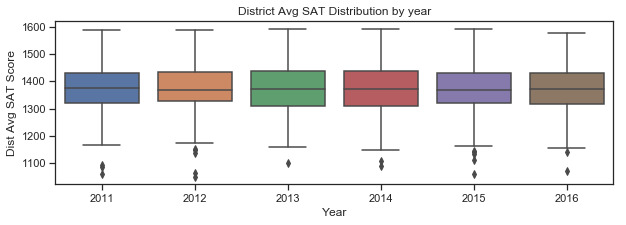

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="Year", y="Dist Avg SAT Score", data=revExpSatCombinedMappingDF, ax=axes)
plt.title("District Avg SAT Distribution by year")
plt.savefig("BoxPlot_SAT.png", dpi=1000,bbox_inches="tight")

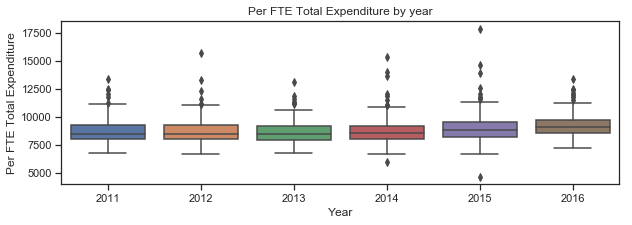

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="Year", y="Per FTE Total Expenditure", data=revExpSatCombinedMappingDF, ax=axes)
plt.title("Per FTE Total Expenditure by year")
plt.savefig("BoxPlot_SAT.png", dpi=1000,bbox_inches="tight")

**<font color='blue'>SAT score & FTE total Expenditure by Year - HISTOGRAM</font>** 

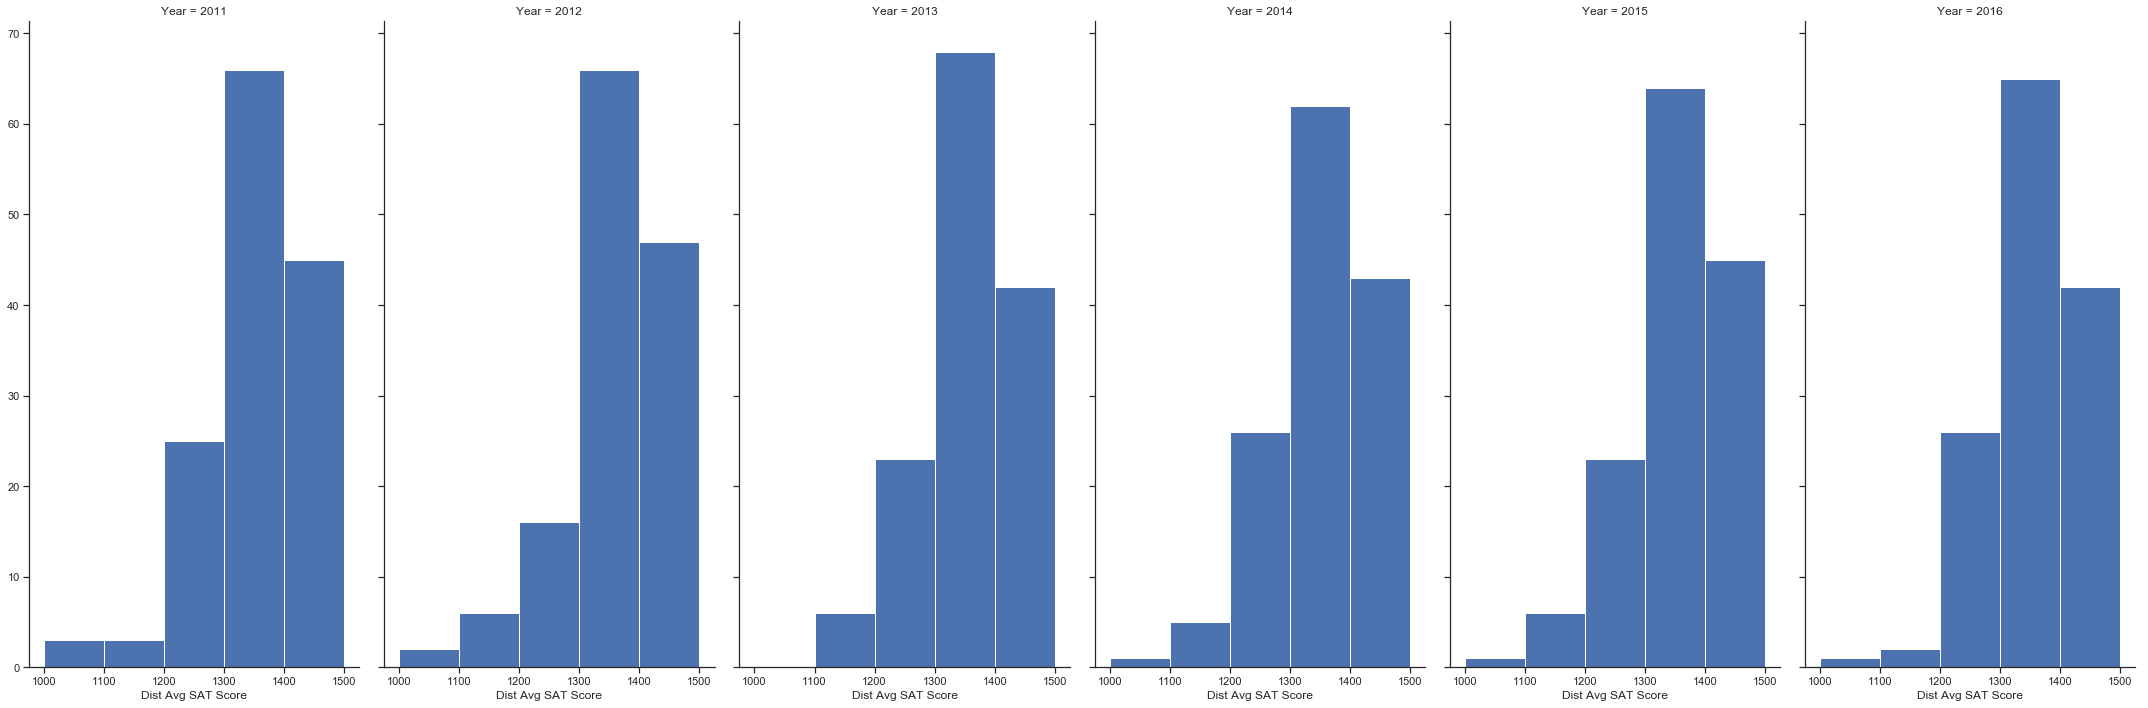

In [174]:
bins = np.arange(1000, 1600, 100)
g = sns.FacetGrid(revExpSatCombinedMappingDF, col="Year", height=10, aspect=.5)
g = g.map(plt.hist, "Dist Avg SAT Score", bins=bins)
g.savefig("Historgam_Dist_avg_score_by_year.png")

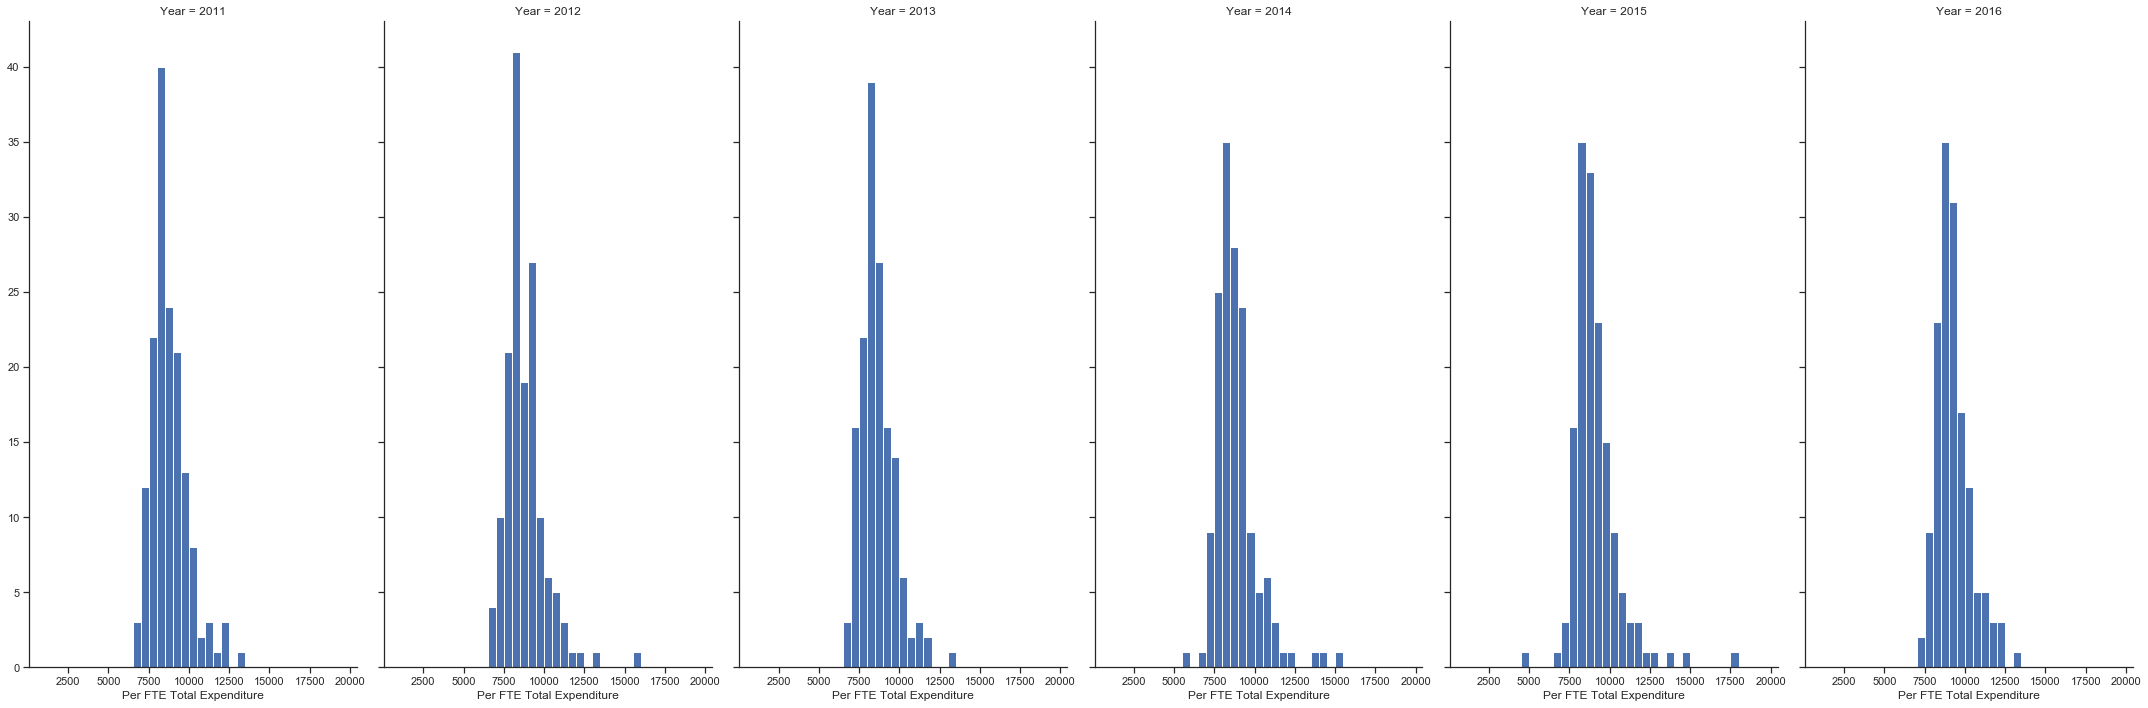

In [175]:
bins = np.arange(1000, 20000, 500)
g = sns.FacetGrid(revExpSatCombinedMappingDF, col="Year", height=10, aspect=.5)
g = g.map(plt.hist, "Per FTE Total Expenditure", bins=bins)
g.savefig("Historgam_FTE_Expenditure_by_year.png")

In [176]:
#Getting the data for yearly Trend
fips2011 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2011]["FIPS"]
fips2012 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2012]["FIPS"]
fips2013 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2013]["FIPS"]
fips2014 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2014]["FIPS"]
fips2015 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2015]["FIPS"]
fips2016 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2016]["FIPS"]

distAvg2011 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2011]["Dist Avg SAT Score"]
distAvg2012 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2012]["Dist Avg SAT Score"]
distAvg2013 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2013]["Dist Avg SAT Score"]
distAvg2014 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2014]["Dist Avg SAT Score"]
distAvg2015 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2015]["Dist Avg SAT Score"]
distAvg2016 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2016]["Dist Avg SAT Score"]


In [177]:
#Color Scale for Mapo
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(255, 255, 0)',
    'rgb(255,0,255)'
]

In [178]:
#2011 Mapping
fig2 = ff.create_choropleth(
    fips=fips2011, values=distAvg2011, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='SAT Score by District', title='District Avg score by County - 2011', 
)
py.iplot(fig2, filename='District Average Score 2011')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [179]:
#2012 Mapping
fig = ff.create_choropleth(
    fips=fips2012, values=distAvg2012, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='SAT Score by District', title='District Avg score by County - 2012', 
)
py.iplot(fig, filename='District Average Score 2012')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [180]:
#2013 Mapping
fig = ff.create_choropleth(
    fips=fips2013, values=distAvg2013, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='SAT Score by District', title='District Avg score by County - 2013', 
)
py.iplot(fig, filename='District Average Score 2013')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [181]:
#2014 Mapping
fig = ff.create_choropleth(
    fips=fips2014, values=distAvg2014, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='SAT Score by District', title='District Avg score by County - 2014', 
)
py.iplot(fig, filename='District Average Score 2014')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [182]:
#2015 Mapping
fig = ff.create_choropleth(
    fips=fips2015, values=distAvg2015, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='SAT Score by District', title='District Avg score by County - 2015', 
)
py.iplot(fig, filename='District Average Score 2015')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [183]:
#2016 Mapping
fig = ff.create_choropleth(
    fips=fips2016, values=distAvg2016, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='SAT Score by District', title='District Avg score by County - 2016', 
)
py.iplot(fig, filename='District Average Score 2016')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




**<font color='black'>PLOTTING</font>:** **<font color='blue'>SCATTER PLOT</font>** 

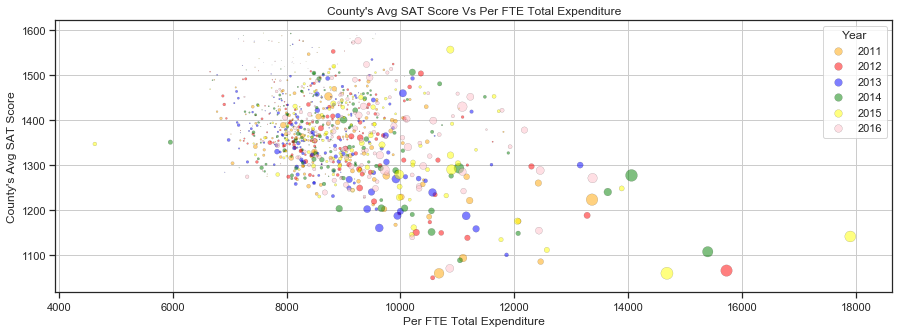

In [184]:
#Creating a scatter plot

fig, ax = plt.subplots(figsize=(15, 5))

#i) First plot for Year = "2011"
ax.scatter(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2011]['Per FTE Total Expenditure'], 
           revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2011]['Dist Avg SAT Score'],  
           c='orange', 
           s=revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2011]['Per FTE/Student'] * 0.1,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2011')

#ii) Plot for Year = "2012"
ax.scatter(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2012]['Per FTE Total Expenditure'], 
           revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2012]['Dist Avg SAT Score'],  
           c='red', 
           s=revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2012]['Per FTE/Student'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2012')

#iii) Plot for Year = "2013"
ax.scatter(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2013]['Per FTE Total Expenditure'], 
           revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2013]['Dist Avg SAT Score'],  
           c='blue', 
           s=revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2013]['Per FTE/Student'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2013')

#iv) Plot for Year = "2014"
ax.scatter(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2014]['Per FTE Total Expenditure'], 
           revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2014]['Dist Avg SAT Score'],  
           c='green', 
           s=revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2014]['Per FTE/Student'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2014')

#v) Plot for Year = "2015"
ax.scatter(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2015]['Per FTE Total Expenditure'], 
           revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2015]['Dist Avg SAT Score'],  
           c='yellow', 
           s=revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2015]['Per FTE/Student'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2015')

#vi) Plot for Year = "2016"
ax.scatter(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2016]['Per FTE Total Expenditure'], 
           revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2016]['Dist Avg SAT Score'],  
           c='pink', 
           s=revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2016]['Per FTE/Student'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2016')
##### Incorporate the other graph properties####
#Setting the Title of the scatter plot
plt.title("County's Avg SAT Score Vs Per FTE Total Expenditure")

#Setting the X and Y axis of scatter plot
plt.xlabel("Per FTE Total Expenditure")
plt.ylabel("County's Avg SAT Score")

#Gridding the scatter plot
plt.grid()

#####  Create a legend  #####
#LEGEND Functions
#1) Setting the Legent title
lgnd = plt.legend(title="Year")

#2) Making the legeng size uniform. 
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]
lgnd.legendHandles[3]._sizes = [60]
lgnd.legendHandles[4]._sizes = [60]
lgnd.legendHandles[5]._sizes = [60]

# Save Figure
plt.savefig("County's Avg SAT Score Vs Per FTE Total Expenditure",dpi=1000,bbox_inches="tight")

plt.show()

In [ ]:
#Creating a scatter plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))


#i) First plot for Year = "2011"
plt.subplot(321) 

stateAvg2011 = np.mean(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2011]['Dist Avg SAT Score'])
revExpSatCombinedMappingDF2011 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2011]
revExpSatCombinedMappingDF2011['color'] = np.where((revExpSatCombinedMappingDF2011['Dist Avg SAT Score'] > stateAvg2011), 'blue', 'red')

plt.scatter(x = revExpSatCombinedMappingDF2011['Per FTE Total Expenditure'], 
           y = revExpSatCombinedMappingDF2011['Dist Avg SAT Score'],  
           c=revExpSatCombinedMappingDF2011['color'], 
           s=revExpSatCombinedMappingDF2011['Per FTE/Student'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2011')

plt.axhline(y=stateAvg2011, color='r', linestyle='-')
plt.grid()
plt.ylabel("County's Avg SAT Score")
plt.title("2011",fontsize = 10)


#ii) First plot for Year = "2012"
plt.subplot(322) 
stateAvg2012 = np.mean(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2012]['Dist Avg SAT Score'])
revExpSatCombinedMappingDF2012 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2012]
revExpSatCombinedMappingDF2012['color'] = np.where((revExpSatCombinedMappingDF2012['Dist Avg SAT Score'] > stateAvg2012), 'blue', 'red')

plt.scatter(x = revExpSatCombinedMappingDF2012['Per FTE Total Expenditure'], 
           y = revExpSatCombinedMappingDF2012['Dist Avg SAT Score'],  
           c=revExpSatCombinedMappingDF2012['color'], 
           s=revExpSatCombinedMappingDF2012['Per FTE/Student'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2012')

plt.axhline(y=stateAvg2012, color='r', linestyle='-')
plt.grid()
plt.title("2012",fontsize = 10)


#iii) First plot for Year = "2013"
plt.subplot(323) 

stateAvg2013 = np.mean(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2013]['Dist Avg SAT Score'])
revExpSatCombinedMappingDF2013 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2013]
revExpSatCombinedMappingDF2013['color'] = np.where((revExpSatCombinedMappingDF2013['Dist Avg SAT Score'] > stateAvg2013), 'blue', 'red')

plt.scatter(x = revExpSatCombinedMappingDF2013['Per FTE Total Expenditure'], 
           y = revExpSatCombinedMappingDF2013['Dist Avg SAT Score'],  
           c=revExpSatCombinedMappingDF2013['color'], 
           s=revExpSatCombinedMappingDF2013['Per FTE/Student'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2013')

plt.axhline(y=stateAvg2013, color='r', linestyle='-')
plt.grid()
plt.ylabel("County's Avg SAT Score")
plt.title("2013",fontsize = 10)


#iv) First plot for Year = "2014"
plt.subplot(324)

stateAvg2014 = np.mean(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2014]['Dist Avg SAT Score'])
revExpSatCombinedMappingDF2014 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2014]
revExpSatCombinedMappingDF2014['color'] = np.where((revExpSatCombinedMappingDF2014['Dist Avg SAT Score'] > stateAvg2014), 'blue', 'red')

plt.scatter(x = revExpSatCombinedMappingDF2014['Per FTE Total Expenditure'], 
           y = revExpSatCombinedMappingDF2014['Dist Avg SAT Score'],  
           c=revExpSatCombinedMappingDF2014['color'], 
           s=revExpSatCombinedMappingDF2014['Per FTE/Student'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2014')

plt.axhline(y=stateAvg2014, color='r', linestyle='-')
plt.grid()
plt.title("2014", fontsize = 10)


#v) First plot for Year = "2015"
plt.subplot(325) 

stateAvg2015 = np.mean(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2015]['Dist Avg SAT Score'])
revExpSatCombinedMappingDF2015 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2015]
revExpSatCombinedMappingDF2015['color'] = np.where((revExpSatCombinedMappingDF2015['Dist Avg SAT Score'] > stateAvg2015), 'blue', 'red')

plt.scatter(x = revExpSatCombinedMappingDF2015['Per FTE Total Expenditure'], 
           y = revExpSatCombinedMappingDF2015['Dist Avg SAT Score'],  
           c=revExpSatCombinedMappingDF2015['color'], 
           s=revExpSatCombinedMappingDF2015['Per FTE/Student'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2015')

plt.axhline(y=stateAvg2015, color='r', linestyle='-')
plt.grid()
plt.xlabel("Per FTE Total Expenditure")
plt.ylabel("County's Avg SAT Score")
plt.title("2015",fontsize = 10)


#vi) First plot for Year = "2016"
plt.subplot(326) 
stateAvg2016 = np.mean(revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2015]['Dist Avg SAT Score'])
revExpSatCombinedMappingDF2016 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF['Year'] == 2016]
revExpSatCombinedMappingDF2016['color'] = np.where((revExpSatCombinedMappingDF2016['Dist Avg SAT Score'] > stateAvg2016), 'blue', 'red')

plt.scatter(x = revExpSatCombinedMappingDF2016['Per FTE Total Expenditure'], 
           y = revExpSatCombinedMappingDF2016['Dist Avg SAT Score'],  
           c=revExpSatCombinedMappingDF2016['color'], 
           s=revExpSatCombinedMappingDF2016['Per FTE/Student'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2016')

plt.axhline(y=stateAvg2016, color='r', linestyle='-')
plt.grid()
plt.xlabel("Per FTE Total Expenditure")
plt.title("2016", fontsize = 10)


# Save Figure
plt.savefig("County's Avg SAT Score Vs Per FTE Total Expenditure byYear",dpi=1000,bbox_inches="tight")


plt.tight_layout()
plt.show()

# Statistical Significance

In [ ]:
#Independent Y variabe = District Avg State Score
Y_Value = revExpSatCombinedMappingDF["Dist Avg SAT Score"]
revExpSatCombinedMappingDF.head()

In [ ]:
#X Dependent Variable
#1) To Start with, we will consider all the other variable ( apart from target variable) as X inputs
X_Value = revExpSatCombinedMappingDF.iloc[:,[6,14]]
#
X_Value.head()

In [ ]:
model = sm.OLS(Y_Value, X_Value).fit()
model.summary()

# COEFFICIENT Values

**Coeff** of _Per FTE Total Expenditure_ is **0.1652**

**Coeff** of _Per FTE/Student_ is **-0.9172**

**LINEAR EQUATION:**  Y = Per FTE Total Expenditure * (0.1652) + Per FTE/Student * (-0.9172)

#                             <u><center><font color=green size=10>CONCLUSION</font></center></u>

 <b><u><Left><font color=black >Null Hypothesis:</font></Left></u></b>
 
 _There isn't any significance between the **District Avgerage SAT Score** and the **FTE Total Expenditure**
 
  <b><u><Left><font color=black >Analysis Result:</font></Left></u></b>
 
From our Data Exploration and Analysis, we were able to find that there is significante correlation between the _District Average SAT Score_ and the independent vairables

- FTE Total Expenditure
- FTE / Student